In [1]:
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
#matplotlib inline
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from skimage import *
from sklearn.model_selection import train_test_split

IMG_SIZE = 28
NUMCLASSES = 10

trainfile = r'..\Data\MNIST\train.csv'
testfile = r'..\Data\MNIST\test.csv'


Using TensorFlow backend.


In [2]:
trainDF = pd.read_csv(trainfile)
testDF = pd.read_csv(testfile)

trainlabels = np.asarray(trainDF.label)
traindigits = np.asarray(trainDF)
traindigits = traindigits[:,1:]

traindigits, valdigits, trainlabels, vallabels = train_test_split(traindigits, trainlabels, test_size=0.2, random_state=42)

testdigits = np.asarray(testDF)

trainDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def digit(arr):
    return arr.reshape(IMG_SIZE, IMG_SIZE)

def make_labels(label):
    labels = np.zeros([NUMCLASSES],np.uint8)
    labels[label] = 1
    return labels
    
def train_data_with_label():
    train_images = []
    for i in range(traindigits.shape[0]):
        img = digit(traindigits[i,:])
        train_images.append([img, make_labels(trainlabels[i])])
    #shuffle(train_images)
    return train_images

def validation_data_with_label():
    validation_images = []
    for i in range(valdigits.shape[0]):
        img = digit(valdigits[i,:])
        validation_images.append([img, make_labels(vallabels[i])])
    #shuffle(validation_images)
    return validation_images
    

In [4]:
make_labels(0)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [5]:
training_images = train_data_with_label()
validation_images = validation_data_with_label()

print((np.array(training_images)).shape)
print((np.array(validation_images)).shape)


(33600, 2)
(8400, 2)


In [6]:
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
tr_lbl_data = np.array([i[1] for i in training_images])
val_img_data = np.array([i[0] for i in validation_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
val_lbl_data = np.array([i[1] for i in validation_images])


In [27]:
model = Sequential()

model.add(InputLayer(input_shape=[IMG_SIZE,IMG_SIZE,1])) #keras will internally add batch dimension

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUMCLASSES,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
__________

In [28]:
#Training
history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=40,batch_size=700,verbose=1)


Epoch 1/40
33600/33600 [==============================] - 8s 251us/step - loss: 9.1713 - acc: 0.4026
Epoch 2/40
33600/33600 [==============================] - 6s 185us/step - loss: 1.1191 - acc: 0.7876
Epoch 3/40
33600/33600 [==============================] - 6s 184us/step - loss: 0.3549 - acc: 0.8961
Epoch 4/40
33600/33600 [==============================] - 6s 184us/step - loss: 0.2628 - acc: 0.9217
Epoch 5/40
33600/33600 [==============================] - 6s 185us/step - loss: 0.2120 - acc: 0.9365
Epoch 6/40
33600/33600 [==============================] - 6s 185us/step - loss: 0.1814 - acc: 0.9465
Epoch 7/40
33600/33600 [==============================] - 6s 186us/step - loss: 0.1581 - acc: 0.9531
Epoch 8/40
33600/33600 [==============================] - 6s 185us/step - loss: 0.1391 - acc: 0.9596
Epoch 9/40
33600/33600 [==============================] - 6s 187us/step - loss: 0.1280 - acc: 0.9626
Epoch 10/40
33600/33600 [==============================] - 6s 189us/step - loss: 0.1184 - a

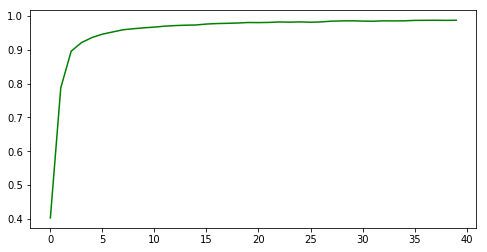

In [31]:
fig = plt.figure(figsize=(8,4))
#plt.plot(history.history['loss'],color='red')
plt.plot(history.history['acc'],color='green')
plt.show()

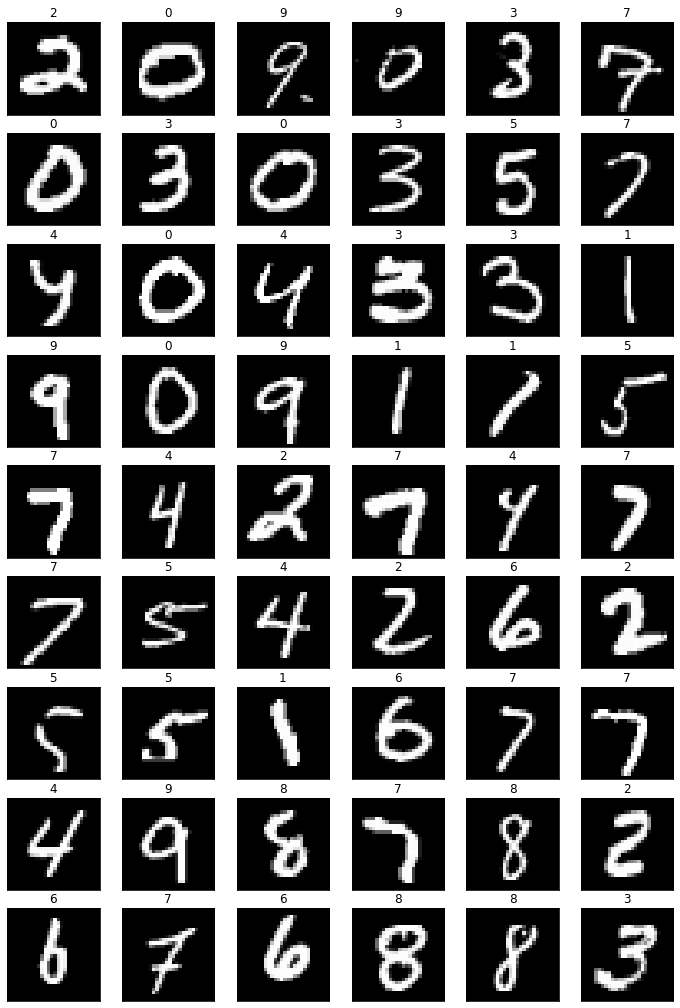

In [35]:
#Testing
fig = plt.figure(figsize=(12, 18))
for i in range(testdigits.shape[0]):
    y = fig.add_subplot(9, 6, i+1)
    img = digit(testdigits[i,:])
    img = img.reshape(1,IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict(img)
    
    str_label= str(np.argmax(model_out))
    
    y.imshow(digit(testdigits[i,:]),cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if i==53:
        break;
plt.show()
